In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import math

%matplotlib inline

In [2]:
df = pd.read_csv('data/hw3.csv')

In [3]:
df.head()

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,73736.747000,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,NaN,SOL,SOL


In [4]:
df.describe()

,open,high,low,close,volume,volumeUSD
count,2667.000000,2163.000000,2378.000000,2.531000e+03,2.667000e+03,0.0
mean,7064.250761,7009.354391,6963.685381,2.307774e+04,4.794219e+05,NaN
std,16866.246913,16878.982545,16683.896987,2.813898e+05,1.651197e+06,NaN
min,1.000200,1.000400,1.000200,1.000500e-02,6.717800e+01,NaN
25%,5.396500,5.052950,5.226625,5.341300e+00,1.324246e+03,NaN
50%,190.387000,192.373000,187.646000,1.900500e+02,1.886909e+04,NaN
75%,284.045000,284.160000,282.607500,1.706660e+03,1.059882e+05,NaN
max,58664.400000,58783.160000,58445.530000,5.688883e+06,3.282850e+07,NaN


In [5]:
df.isnull().sum()

ts              0
open            0
high          504
low           289
close         136
volume          0
volumeUSD    2667
token           0
chain           0
dtype: int64

In [6]:
df.shape

(2667, 9)

<AxesSubplot:>

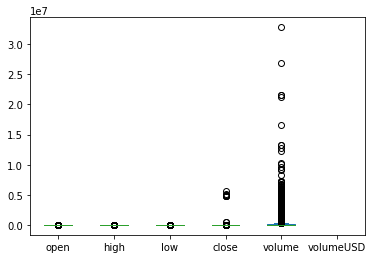

In [7]:
df.plot(kind='box')

In [8]:
df['high'].fillna(method='ffill', inplace=True)

In [9]:
df['low'].fillna(method='ffill', inplace=True)

In [10]:
df.isnull().sum()

ts              0
open            0
high            0
low             0
close         136
volume          0
volumeUSD    2667
token           0
chain           0
dtype: int64

In [11]:
df.loc[df['close'].isnull(), 'close'] = 0.5 * (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])

<AxesSubplot:>

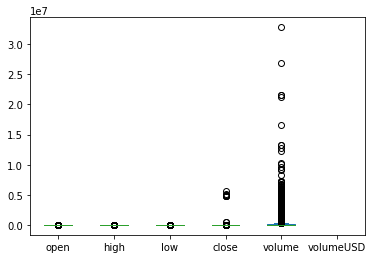

In [12]:
df.plot(kind='box')

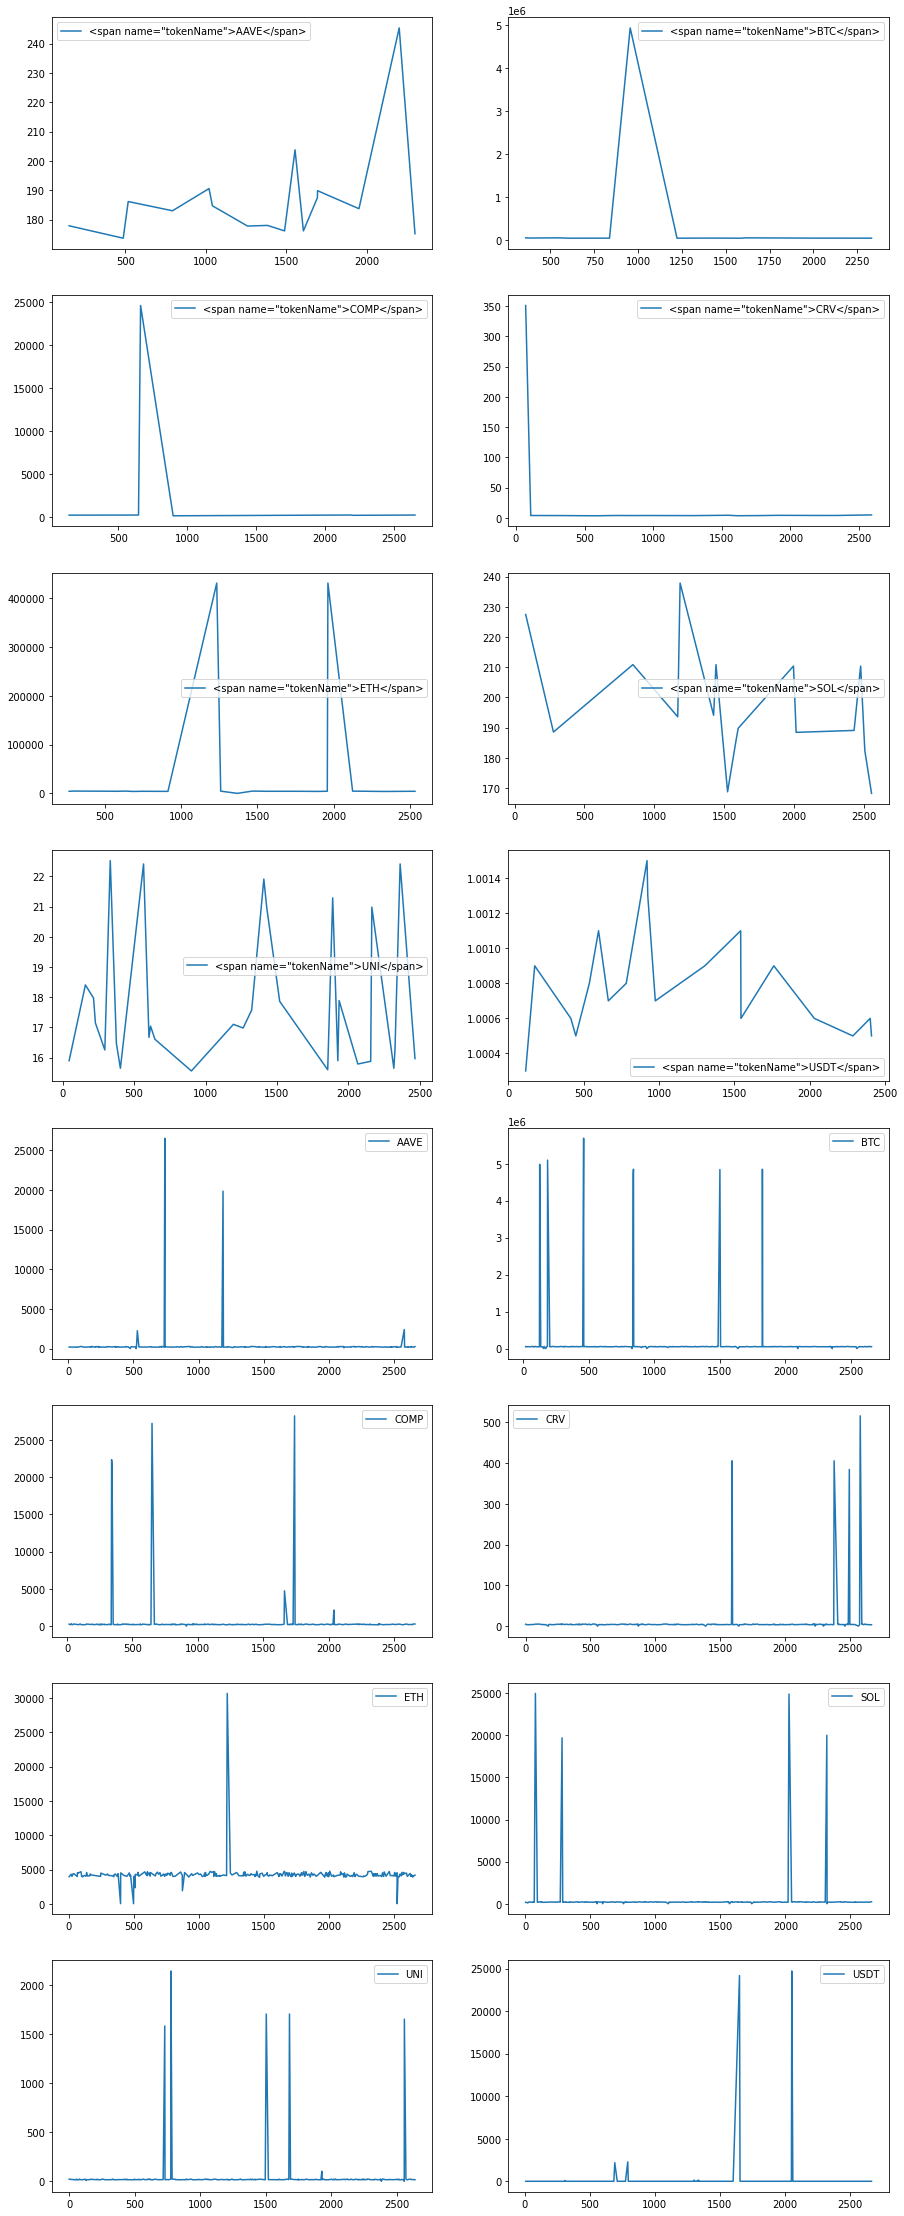

In [13]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


In [14]:
df.duplicated().sum()

224

In [15]:
df = df.drop_duplicates()

In [16]:
df.token.unique()

array(['UNI', 'CRV', 'SOL', 'ETH', 'AAVE', 'USDT', 'COMP', 'BTC',
       '<span name="tokenName">UNI</span>',
       '<span name="tokenName">CRV</span>',
       '<span name="tokenName">SOL</span>',
       '<span name="tokenName">USDT</span>',
       '<span name="tokenName">COMP</span>',
       '<span name="tokenName">AAVE</span>',
       '<span name="tokenName">ETH</span>',
       '<span name="tokenName">BTC</span>'], dtype=object)

In [17]:
import xml

In [18]:
def remove_tags(text):
    return ''.join(xml.etree.ElementTree.fromstring(text).itertext())

In [19]:
df.token.unique()

array(['UNI', 'CRV', 'SOL', 'ETH', 'AAVE', 'USDT', 'COMP', 'BTC',
       '<span name="tokenName">UNI</span>',
       '<span name="tokenName">CRV</span>',
       '<span name="tokenName">SOL</span>',
       '<span name="tokenName">USDT</span>',
       '<span name="tokenName">COMP</span>',
       '<span name="tokenName">AAVE</span>',
       '<span name="tokenName">ETH</span>',
       '<span name="tokenName">BTC</span>'], dtype=object)

In [20]:
# for token in df.token.unique():
#     remove_tags(token)

In [21]:
df.token.unique()

array(['UNI', 'CRV', 'SOL', 'ETH', 'AAVE', 'USDT', 'COMP', 'BTC',
       '<span name="tokenName">UNI</span>',
       '<span name="tokenName">CRV</span>',
       '<span name="tokenName">SOL</span>',
       '<span name="tokenName">USDT</span>',
       '<span name="tokenName">COMP</span>',
       '<span name="tokenName">AAVE</span>',
       '<span name="tokenName">ETH</span>',
       '<span name="tokenName">BTC</span>'], dtype=object)

In [22]:
fill = df.loc[df['token'].str.contains('<span name="tokenName">'), 'token'].str.extract('<span name="tokenName">(.*?)<\/span>')

In [23]:
df.loc[df['token'].str.contains('<span name="tokenName">'), 'token']

45       <span name="tokenName">UNI</span>
71       <span name="tokenName">CRV</span>
79       <span name="tokenName">SOL</span>
108      <span name="tokenName">CRV</span>
114     <span name="tokenName">USDT</span>
                       ...                
2531     <span name="tokenName">ETH</span>
2533     <span name="tokenName">ETH</span>
2556     <span name="tokenName">SOL</span>
2591     <span name="tokenName">CRV</span>
2651    <span name="tokenName">COMP</span>
Name: token, Length: 139, dtype: object

In [24]:
df.loc[df['token'].str.contains('<span'), 'token']

45       <span name="tokenName">UNI</span>
71       <span name="tokenName">CRV</span>
79       <span name="tokenName">SOL</span>
108      <span name="tokenName">CRV</span>
114     <span name="tokenName">USDT</span>
                       ...                
2531     <span name="tokenName">ETH</span>
2533     <span name="tokenName">ETH</span>
2556     <span name="tokenName">SOL</span>
2591     <span name="tokenName">CRV</span>
2651    <span name="tokenName">COMP</span>
Name: token, Length: 139, dtype: object

In [25]:
df.loc[df['token'].str.contains('<span name="tokenName">'), 'token'].str.extract('<span name="tokenName">(.*?)<\/span>').squeeze()

45       UNI
71       CRV
79       SOL
108      CRV
114     USDT
        ... 
2531     ETH
2533     ETH
2556     SOL
2591     CRV
2651    COMP
Name: 0, Length: 139, dtype: object

In [26]:
df.loc[df['token'].str.contains('<span'), 'token'] = df.loc[df['token'].str.contains('<span name="tokenName">'), 'token'].str.extract('<span name="tokenName">(.*?)<\/span>').squeeze()


/Users/klimyadrintsev/anaconda3/envs/mfe-preprogram/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [27]:
# df.loc[df['token'].str.contains('<span'), 'token'] = df.loc[df['token'].str.contains('<span name="tokenName">'), 'token'].str.extract('<span name="tokenName">(.|\n)*?<\/span>')


In [28]:
df.token.unique()

array(['UNI', 'CRV', 'SOL', 'ETH', 'AAVE', 'USDT', 'COMP', 'BTC'],
      dtype=object)

In [29]:
df.isnull().sum()

ts              0
open            0
high            0
low             0
close           0
volume          0
volumeUSD    2443
token           0
chain           0
dtype: int64

In [30]:
df.isnull().sum()

ts              0
open            0
high            0
low             0
close           0
volume          0
volumeUSD    2443
token           0
chain           0
dtype: int64

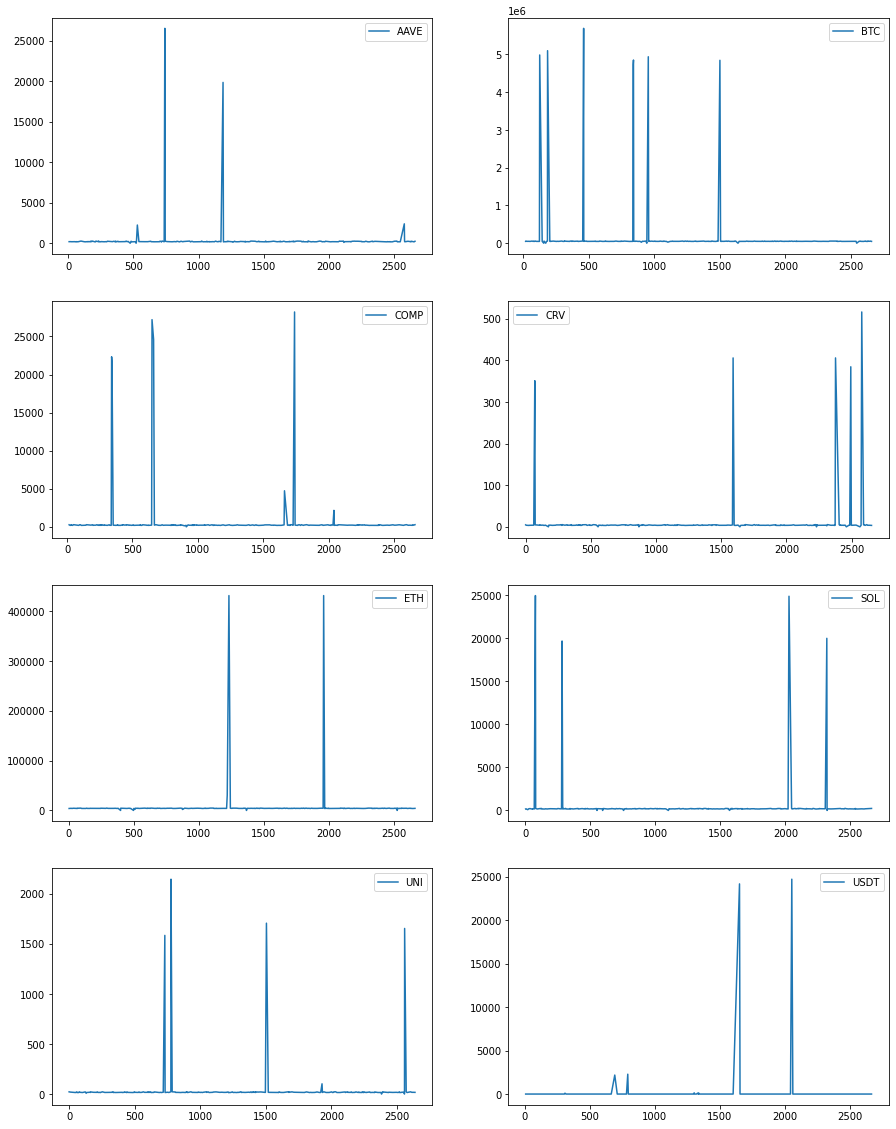

In [31]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


In [32]:
df.loc[df['close'].isnull(), 'close'] = 0.5 * (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])

/Users/klimyadrintsev/anaconda3/envs/mfe-preprogram/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


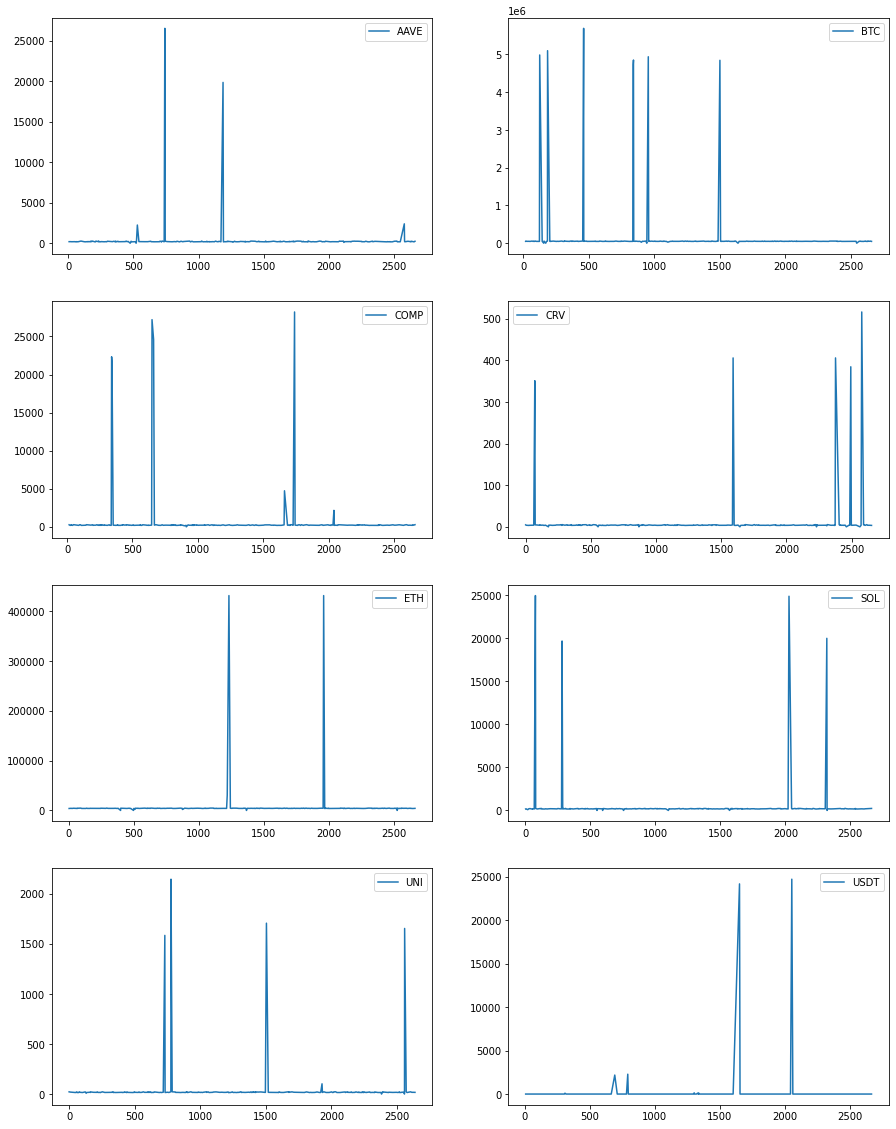

In [33]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


In [34]:
df.loc[df.close / df.open >= 2, 'close'] = 0.5 * (df.loc[df.close / df.open >= 2, 'high'] + df.loc[df.close / df.open >= 2, 'low'])

In [35]:
0.5 * (df.loc[df.close / df.open >= 2, 'high'] + df.loc[df.close / df.open >= 2, 'low'])

77      24979.36500
309        97.99540
530      2244.15750
662     24610.43500
692      2184.26040
792      2283.72060
1220    30639.82000
1228        8.28525
1303      136.31555
1329        2.35545
1337      128.81060
1558        2.63705
1651    24169.77025
1663     4737.25000
1929      102.50550
2028    24901.66650
2041     2162.42500
2053    24708.77540
2130        9.35490
2580     2391.63050
dtype: float64

In [36]:
df.loc[df.close / df.open >= 2, 'close']

77      24979.36500
309        97.99540
530      2244.15750
662     24610.43500
692      2184.26040
792      2283.72060
1220    30639.82000
1228        8.28525
1303      136.31555
1329        2.35545
1337      128.81060
1558        2.63705
1651    24169.77025
1663     4737.25000
1929      102.50550
2028    24901.66650
2041     2162.42500
2053    24708.77540
2130        9.35490
2580     2391.63050
Name: close, dtype: float64

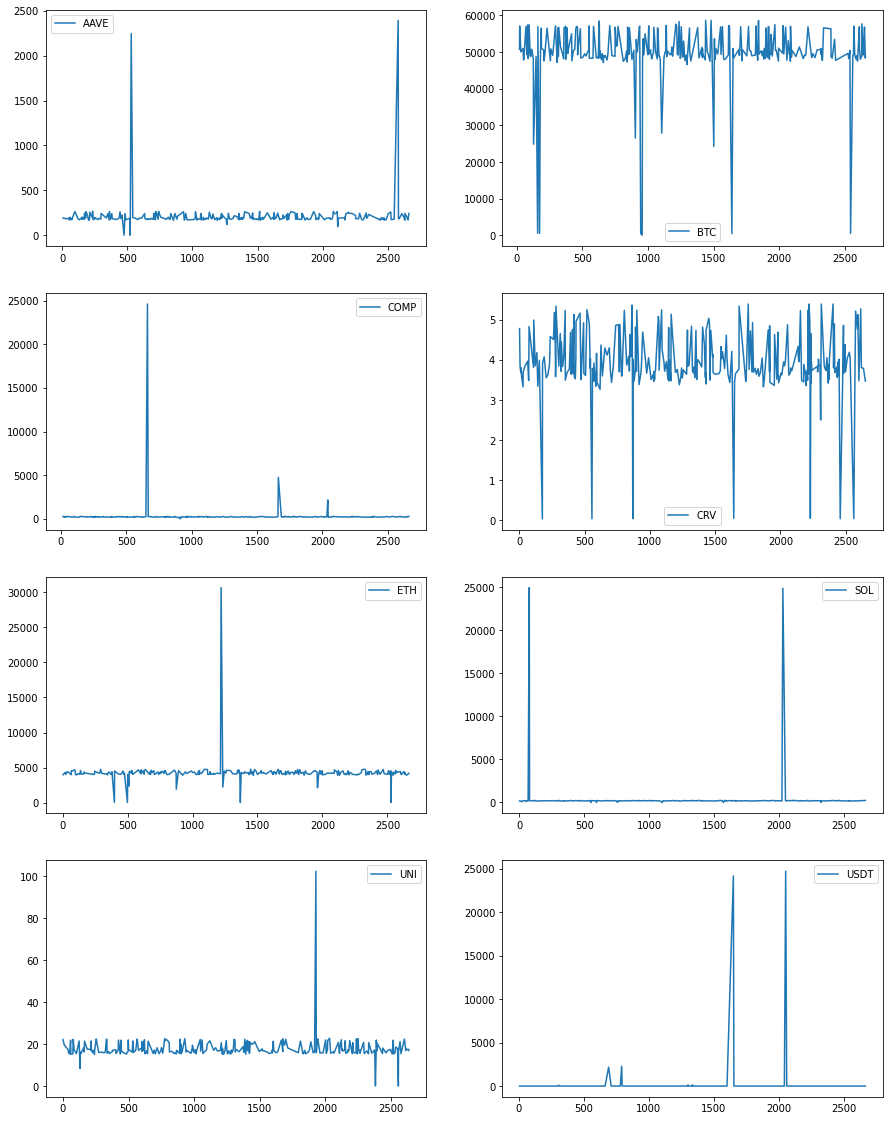

In [37]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


In [38]:
df.loc[df.close >= (df.close.mean() *5), 'close'] = df.ffill()


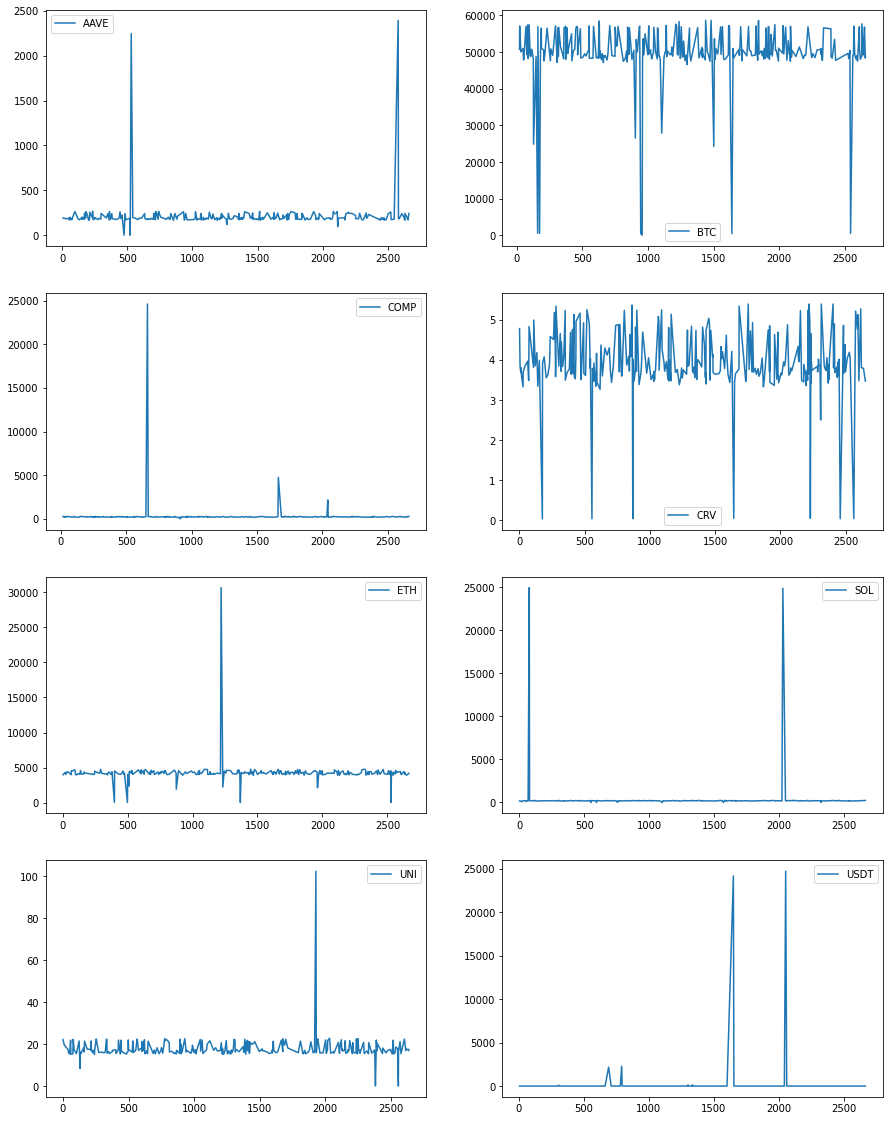

In [39]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


<AxesSubplot:>

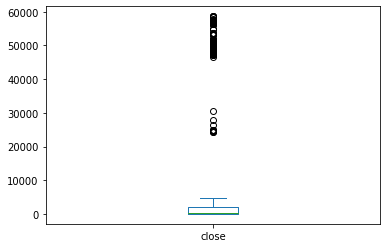

In [40]:
df.close.plot(kind='box')

In [41]:
df.mean()

/var/folders/3s/_b4msy911pd2fxsnmqbwmlnh0000gn/T/ipykernel_30250/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


open           7056.645604
high           7018.537292
low            6843.953050
close          6943.410938
volume       480637.855144
volumeUSD              NaN
dtype: float64

In [42]:
df.head()

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,4.8043,175.2100,175.8600,73736.747000,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,NaN,SOL,SOL


In [43]:
df.describe()

,open,high,low,close,volume,volumeUSD
count,2443.000000,2443.000000,2443.000000,2443.000000,2.443000e+03,0.0
mean,7056.645604,7018.537292,6843.953050,6943.410938,4.806379e+05,NaN
std,16846.125749,16849.892291,16518.498286,16642.386812,1.629829e+06,NaN
min,1.000200,1.000400,1.000200,0.010005,6.717800e+01,NaN
25%,5.396500,4.993200,5.207000,5.392900,1.330988e+03,NaN
50%,190.387000,192.689000,187.393000,189.850000,1.872362e+04,NaN
75%,2079.555000,285.090000,3883.105000,2032.852600,1.072316e+05,NaN
max,58664.400000,58783.160000,58445.530000,58664.400000,3.282850e+07,NaN


for token in df.token.unique():
    df = df[np.abs(df[df.close == token] - df[df.close ==token]).mean() <= ((3*df[df.close == token]).std())]
    

In [44]:
df.token.unique()

array(['UNI', 'CRV', 'SOL', 'ETH', 'AAVE', 'USDT', 'COMP', 'BTC'],
      dtype=object)

In [45]:
df[df.token == 'BTC'].loc[df.close - df.close.mean() <= (2*df.close.std()), 'close'].describe()

count       10.000000
mean     10604.091940
std      13174.418634
min         15.395000
25%        488.047600
50%        541.293700
75%      24700.481250
max      27865.965550
Name: close, dtype: float64

In [46]:
df.replace(to_replace=df[df.token == 'BTC'].loc[df.close - df.close.mean() <= (2*df.close.std()), 'close'], value = np.nan, inplace=True )

In [52]:
df[df.token == 'BTC']

,ts,open,high,low,close,volume,volumeUSD,token,chain
20,2021-12-08 21:00:00,50473.66,4346.9700,50369.08,50748.89,547.654418,NaN,BTC,BTC
21,2021-12-01 23:00:00,57026.25,57201.4800,56656.74,57107.93,828.590651,NaN,BTC,BTC
30,2021-12-09 08:00:00,49666.56,3.7980,49230.00,50059.41,540.538565,NaN,BTC,BTC
46,2021-12-07 19:00:00,51057.39,15.9400,50961.99,50976.21,497.269372,NaN,BTC,BTC
51,2021-12-10 07:00:00,48265.25,48446.9500,15.23,47875.77,274.598073,NaN,BTC,BTC
...,...,...,...,...,...,...,...,...,...
2642,2021-12-12 02:00:00,49362.45,206.4200,195.22,49206.30,302.213814,NaN,BTC,BTC
2644,2021-12-07 00:00:00,50875.00,1.0012,50356.48,50529.56,1013.624829,NaN,BTC,BTC
2650,2021-12-03 13:00:00,57033.85,57249.8000,56794.02,56840.69,328.032575,NaN,BTC,BTC
2656,2021-12-06 14:00:00,48530.81,48746.7200,170.90,48357.63,867.635374,NaN,BTC,BTC


In [53]:
df[df.token == 'BTC']

,ts,open,high,low,close,volume,volumeUSD,token,chain
20,2021-12-08 21:00:00,50473.66,4346.9700,50369.08,50748.89,547.654418,NaN,BTC,BTC
21,2021-12-01 23:00:00,57026.25,57201.4800,56656.74,57107.93,828.590651,NaN,BTC,BTC
30,2021-12-09 08:00:00,49666.56,3.7980,49230.00,50059.41,540.538565,NaN,BTC,BTC
46,2021-12-07 19:00:00,51057.39,15.9400,50961.99,50976.21,497.269372,NaN,BTC,BTC
51,2021-12-10 07:00:00,48265.25,48446.9500,15.23,47875.77,274.598073,NaN,BTC,BTC
...,...,...,...,...,...,...,...,...,...
2642,2021-12-12 02:00:00,49362.45,206.4200,195.22,49206.30,302.213814,NaN,BTC,BTC
2644,2021-12-07 00:00:00,50875.00,1.0012,50356.48,50529.56,1013.624829,NaN,BTC,BTC
2650,2021-12-03 13:00:00,57033.85,57249.8000,56794.02,56840.69,328.032575,NaN,BTC,BTC
2656,2021-12-06 14:00:00,48530.81,48746.7200,170.90,48357.63,867.635374,NaN,BTC,BTC


(df[df.token == token].loc[df.close - df.close.mean() <= (3*df.close.std()), 'close'])

(df[df.token == token].loc[df.close - df.close.mean() <= (2*df.close.std()), 'close'])

df.mask((df[df.token == token].loc[df.close - df.close.mean() <= (3*df.close.std()), 'close']), other=np.nan, inplace=True)

x = df[df.token == 'BTC']
x[((x.close - x.close.mean()) <= (2*x.close.std()))]

df.where((df[df.token == 'BTC'].loc[(df.close - df.close.mean()) <= (2*df.close.std())].close), np.nan, inplace=True)

df = (df[df.token == 'BTC'].loc[(df.close - df.close.mean()) <= (2*df.close.std())].close)

df[df.token == 'BTC'].close.mean()


df[df.token == 'ETH'].close.mean()

df[df.token == 'BTC'].close.std()

index_t = df[df.token == 'BTC'].loc[(df.close - df.close.mean()) <= (2*df.close.std())].index
len(index_t)

df.iloc[314, df.columns.get_loc('close')] = np.nan

for token in (df.token.unique()):
    index_t = (df[df.token == token].loc[(df.close - df.close.mean()) <= (2*df.close.std())]).index
    print(token, index_t)
    for i in range(len(index_t)):
        df.at[i, df.columns.get_loc('close')] = np.nan

df[df.token == 'BTC'].loc[df.close - df.close.mean() <= (2*df.close.std()), 'close']

df[df.token == 'BTC'].loc[df.close - df.close.mean() >= (3*df.close.std()), 'close']

for token in df.token.unique():
    df.mask((df[df.token == token].loc[df.close - df.close.mean() <= (3*df.close.std()), 'close']), other=np.nan, inplace=True) 

for token in df.token.unique():
    df[df.token == token].loc[df.close - df.close.mean() <= (3*df.close.std()), 'close']

df = df[np.abs(df[df.close == token] - df[df.close ==token]).mean() <= ((3*df[df.close == token]).std())]

df.loc[(df.close - df.close.mean()) <= (3*df.close.std()), 'close'] = (df.loc[df.close.ffill()])


df[df.token == 'BTC']

df[df.token == 'BTC'].loc[df.close - df.close.mean() <= (3*df.close.std()), 'close']

df.replace(df[df.token == 'BTC'].loc[df.close - df.close.mean() <= (3*df.close.std()), 'close'], np.nan)

df[df.token == 'BTC'].loc[df.close - df.close.mean() <= (3*df.close.std()), 'close']

df[df.token == 'BTC'][df.close - df.close.mean() <= (3*df.close.std()), 'close']


for token in df.token.unique():
    print(token)
    (df.loc[df.token == token].loc[df.close - df.close.mean() <= (3*df.close.std()), 'close']) = np.nan
    

df.close.isnull().sum()

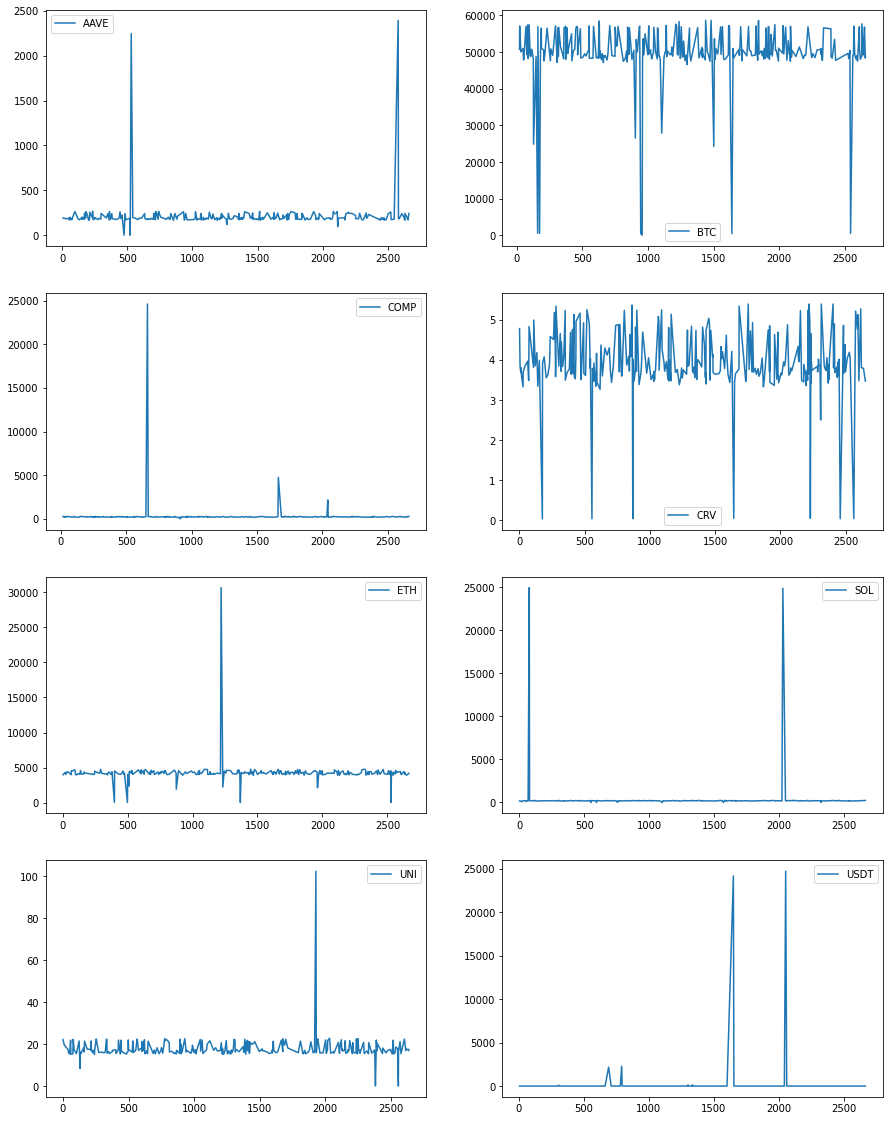

In [55]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


# I have tried everything. I am sorry.

In [56]:
df.head()

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,4.8043,175.2100,175.8600,73736.747000,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,NaN,SOL,SOL


In [57]:
df.volumeUSD = df.volume * df.close

In [58]:
df.volumeUSD

0       7.041235e+05
1       3.522644e+05
2       1.296734e+07
3       7.352023e+07
4       1.341009e+07
            ...     
2661    1.350189e+05
2662    2.308318e+05
2663    8.503920e+06
2665    5.729636e+07
2666    1.796152e+06
Name: volumeUSD, Length: 2443, dtype: float64

In [ ]:
# :(